In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from calendar import month_name

In [2]:
df = pd.read_csv("desktop/hotel_booking.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

### Drop Columns 

In [6]:
df = df.drop(columns=['company', 'agent'], axis = 1)

In [7]:
adr_data = df.groupby("hotel")["adr"].median()

### Average Day Rate of City and Resort Hotel

In [8]:
city_median_adr = adr_data[0]
resort_median_adr = adr_data[1]

print("City Hotel median average day rate is " + str(city_median_adr) + " pounds.")
print("Resort Hotel median average day rate is " + str(resort_median_adr) + " pounds.")

City Hotel median average day rate is 99.9 pounds.
Resort Hotel median average day rate is 75.0 pounds.


### Cancellation Rate of ALL Hotel Bookings

In [9]:
canceled_count = df["is_canceled"].value_counts()[1]
not_canceled_count = df["is_canceled"].value_counts()[0]

In [10]:
total_cancellation_data = df["is_canceled"].value_counts().sum()

In [11]:
canceled_perc = round(canceled_count / total_cancellation_data * 100, 2)
print(str(canceled_perc) + "% of all guests canceled their reservation.")

37.04% of all guests canceled their reservation.


In [12]:
not_canceled_perc = round(not_canceled_count / total_cancellation_data * 100, 2)
print(str(not_canceled_perc) + "% of all guests did not cancel their reservation.")

62.96% of all guests did not cancel their reservation.


<AxesSubplot:>

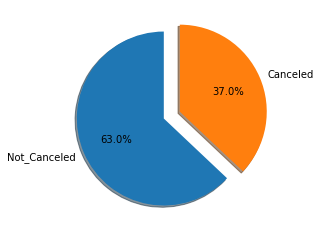

In [13]:
cancel_df = df["is_canceled"].value_counts()

labels = ["Not_Canceled", "Canceled"]
explode = [0.1, 0.1]

cancel_df.plot.pie(labels = labels, ylabel = "", startangle = 90, explode = explode, shadow = True, autopct='%1.1f%%')

### Cancellation by Country

<AxesSubplot:xlabel='country', ylabel='is_canceled'>

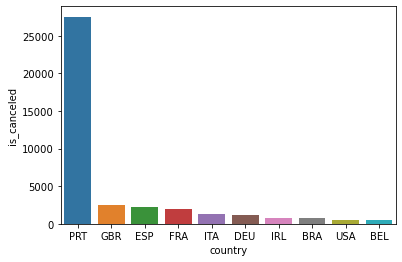

In [14]:
top10_cancel_country = df.groupby("country")["is_canceled"].sum().sort_values(ascending = False).head(10)
top10_cancel_country = top10_cancel_country.reset_index()
top10_cancel_country.rename(columns = {"country" : "country", "is_canceled" : "canceled"})
sns.barplot(data = top10_cancel_country, x = "country", y = "is_canceled")

### Portugal Cancallation Rate of City Hotel and Resort Hotel 

<AxesSubplot:title={'center':'Portugal Resort Hotel Cancellation Rate'}>

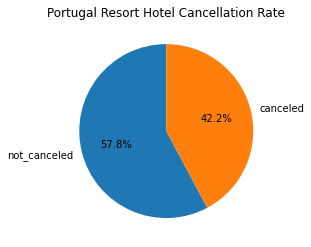

In [15]:
prt_resort_df = df[(df["country"] == "PRT") & (df["hotel"] == "Resort Hotel")]
prt_hotel_df = df[(df["country"] == "PRT") & (df["hotel"] == "City Hotel")]

prt_resort_cancel_df = prt_resort_df["is_canceled"].value_counts()

prt_hotel_cancel_df = prt_hotel_df["is_canceled"].value_counts()

labels = ["not_canceled", "canceled"]

prt_resort_cancel_df.plot.pie(labels = labels, startangle = 90, ylabel = "", autopct='%1.1f%%', title = "Portugal Resort Hotel Cancellation Rate")

<AxesSubplot:title={'center':'Portugal City Hotel Cancellation Rate'}>

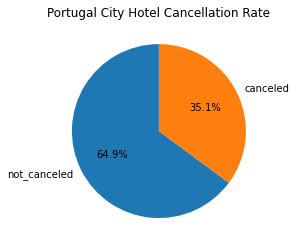

In [16]:
prt_hotel_cancel_df.plot.pie(labels = labels, startangle = 90, ylabel = "", autopct='%1.1f%%', title = "Portugal City Hotel Cancellation Rate")

### Monthly Average Day Rate of City Hotel and Resort Hotel

Text(0.5, 1.0, 'Average Day Rate of City and Resort Hotel')

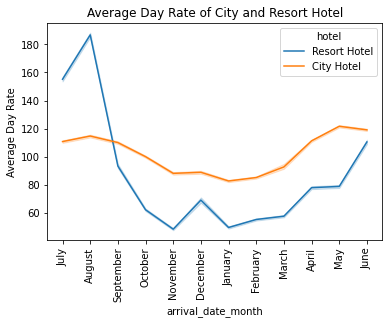

In [17]:
city_df = df[df["hotel"] == "City Hotel"]
resort_df = df[df["hotel"] == "Resort Hotel"]

sns.lineplot(data = df, x = "arrival_date_month", y = "adr", hue = "hotel")
plt.xticks(rotation = 90)
plt.ylabel("Average Day Rate")
plt.title("Average Day Rate of City and Resort Hotel")

### Monthly Total Cancellation Count of City and Resort Hotel

Text(0, 0.5, 'Cancellation Count')

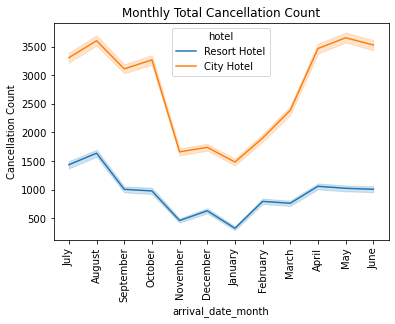

In [18]:
sns.lineplot(data = df, x = "arrival_date_month", y = "is_canceled", estimator=sum, hue = "hotel")

plt.xticks(rotation=90)
plt.title("Monthly Total Cancellation Count")
plt.ylabel("Cancellation Count")

### Monthly Average Nights of Stay of City and Resort Hotels

Text(0, 0.5, 'Average Nights of Stay')

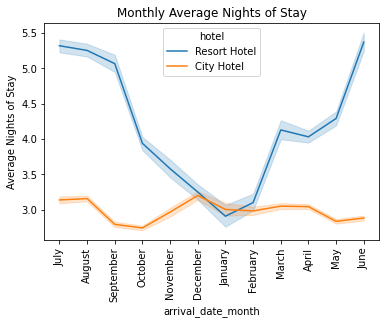

In [19]:
df["total_nights"] = df["stays_in_week_nights"]  +  df["stays_in_weekend_nights"]  

sns.lineplot(data = df, x = "arrival_date_month", y = "total_nights", hue = "hotel")

plt.xticks(rotation = 90)
plt.title("Monthly Average Nights of Stay")
plt.ylabel("Average Nights of Stay")

### Monthly Average number of guests per booking

Text(0, 0.5, 'Average number of guests')

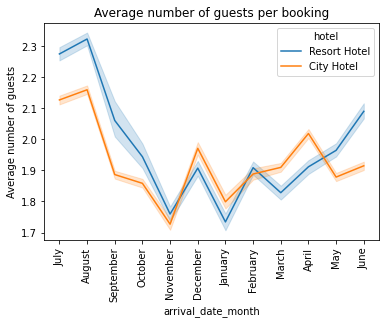

In [20]:
df["total_guests"] = df["children"] + df["adults"] + df["babies"]

sns.lineplot(data = df, x = "arrival_date_month", y = "total_guests", hue = "hotel")
plt.xticks(rotation = 90)
plt.title("Average number of guests per booking")
plt.ylabel("Average number of guests")

### City Hotel Cancellation Count of Each Deposit Type

/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8209/41696388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df["is_canceled_text"] = city_df["is_canceled"]
/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8209/41696388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df["is_canceled_text"] = city_df["is_canceled_text"].replace([0, 1], ["Not Canceled", "Cancelled"])


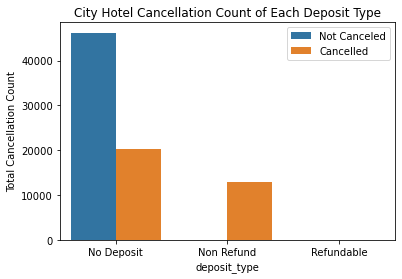

In [21]:
city_df["is_canceled_text"] = city_df["is_canceled"]
city_df["is_canceled_text"] = city_df["is_canceled_text"].replace([0, 1], ["Not Canceled", "Cancelled"])

sns.barplot(data = city_df, x = "deposit_type", y = "is_canceled", hue = "is_canceled_text", estimator = len)

plt.ylabel("Total Cancellation Count")
plt.title("City Hotel Cancellation Count of Each Deposit Type")

plt.legend(title = "")

### Resort Hotel Cancellation Count of Each Deposit Type

/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8209/680284863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_df["is_canceled_text"] = resort_df["is_canceled"]
/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8209/680284863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_df["is_canceled_text"] = resort_df["is_canceled_text"].replace([0, 1], ["Not Canceled", "Cancelled"])


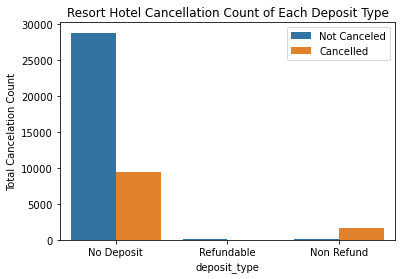

In [22]:
resort_df["is_canceled_text"] = resort_df["is_canceled"]
resort_df["is_canceled_text"] = resort_df["is_canceled_text"].replace([0, 1], ["Not Canceled", "Cancelled"])

sns.barplot(data = resort_df, x = "deposit_type", y = "is_canceled", estimator = len, hue = "is_canceled_text")
plt.ylabel("Total Cancelation Count")
plt.title("Resort Hotel Cancellation Count of Each Deposit Type")
plt.legend(title = "")

### City Hotel Cancellation Count of Each Distribution Channel

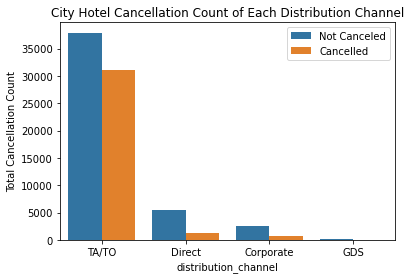

In [23]:
city_df = city_df[city_df.distribution_channel != "Undefined"]

city_df["is_canceled_text"] = city_df["is_canceled"]
city_df["is_canceled_text"] = city_df["is_canceled_text"].replace([0, 1], ["Not Canceled", "Cancelled"])

sns.barplot(data = city_df, x = "distribution_channel", y = "is_canceled", hue = "is_canceled_text", estimator = len)
plt.title("City Hotel Cancellation Count of Each Distribution Channel")
plt.ylabel("Total Cancellation Count")
plt.legend(title = "")
# plt.legend(labels = ["not_canceled", "is_canceled"])

### Resort Hotel Cancellation Count of Each Distribution Channel

/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8209/776642795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_df["is_canceled_text"] = resort_df["is_canceled"]
/var/folders/nr/6y7_lswx63xc9dv22_31k_lc0000gn/T/ipykernel_8209/776642795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_df["is_canceled_text"] = resort_df["is_canceled_text"].replace([0, 1], ["Not Canceled", "Cancelled"])


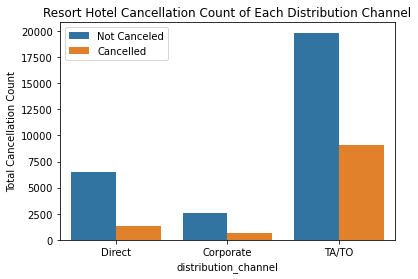

In [24]:
resort_df["is_canceled_text"] = resort_df["is_canceled"]
resort_df["is_canceled_text"] = resort_df["is_canceled_text"].replace([0, 1], ["Not Canceled", "Cancelled"])

resort_df = resort_df[resort_df.distribution_channel != "Undefined"]
sns.barplot(data = resort_df, x = "distribution_channel", y = "is_canceled", hue = "is_canceled_text", estimator = len)
plt.title("Resort Hotel Cancellation Count of Each Distribution Channel")
plt.ylabel("Total Cancellation Count")
plt.legend(title = "")